
# Anomaly Detection using Autoencoders

In this project, I explore the application of autoencoders for anomaly detection. By working with a mystery dataset containing multiple explanatory variables and a response variable, I aim to identify anomalous data points.



## Context of the Project

For this project, I'm working with a mystery dataset that consists of 9 explanatory variables and one response variable. The response variable, found in the last column, indicates whether a sample is anomalous (1 for anomalous, 0 for valid). This dataset is sourced from "data.csv".

While it might be possible to utilize supervised learning to create a model for anomaly detection, my primary interest lies in the capabilities of autoencoders. Even though I'm aware of the low anomaly rate in the dataset, I've chosen to approach this problem as if I'm unaware of the anomalous data points. This will allow me to truly test the effectiveness of the autoencoder in detecting anomalies.


In [1]:

## Project Breakdown

Throughout this exploration, I've divided my approach into several key stages:

1. **Data Pre-processing**: I delved into the initial dataset, focusing on the steps and techniques used to preprocess the data for this unsupervised learning model.
2. **Model Training**: I ensured the model trained to convergence, selecting a topology that incorporated 2 encoded variables.
3. **Threshold Selection**: One crucial step involved determining a suitable threshold for identifying anomalous data. I'll discuss my rationale behind the chosen threshold.
4. **Implementing a VAE**: As a final step, I experimented with implementing a Variational Autoencoder (VAE) and tested its capabilities against the dataset.



## Project Challenges

While training a modest feed-forward network using supervised learning can yield impressive recall and precision rates, especially with unbalanced datasets, I decided to take a different route. My primary goal was to detect anomalies using an autoencoder without relying on the 'Anom' flag for training guidance.

One of the initial challenges was sourcing the mystery dataset. After obtaining it, I faced the subsequent steps and their inherent complexities, which I've outlined in the project breakdown.



### Data Pre-processing

During the data preprocessing phase, I focused on understanding the nature of the dataset and preparing it for the subsequent stages. One crucial decision involved how I partitioned the data into training and test sets. Given the limited knowledge about the anomalous samples, except for their scarcity, I approached this step with caution to ensure a representative split.


**Step 1: data preprocessing**

Explain any preprocessing steps I take and also how I have selected the training and test sets. Remember we do not know which samples are anomalous only that there are a small number of them compared to the total sample size.


In this step, I explored the data's characteristics and made necessary adjustments to ensure its suitability for the modeling phase.

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49097 entries, 0 to 49096
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      49097 non-null  int64
 1   V2      49097 non-null  int64
 2   V3      49097 non-null  int64
 3   V4      49097 non-null  int64
 4   V5      49097 non-null  int64
 5   V6      49097 non-null  int64
 6   V7      49097 non-null  int64
 7   V8      49097 non-null  int64
 8   V9      49097 non-null  int64
 9   Anom    49097 non-null  int64
dtypes: int64(10)
memory usage: 3.7 MB


In [4]:
#gets statistic about the dataset columns
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Anom
count,49097.000000,49097.000000,49097.000000,49097.000000,49097.000000,49097.000000,49097.000000,49097.000000,49097.000000,49097.000000
mean,46.932399,-0.063955,85.123124,0.213231,36.871784,2.160030,38.200725,48.288592,10.261930,0.071511
std,12.875159,84.674481,8.877517,37.579171,19.963113,218.324964,13.446306,20.572064,23.751024,0.257680
min,27.000000,-4821.000000,21.000000,-3939.000000,-188.000000,-26739.000000,-48.000000,-353.000000,-356.000000,0.000000
25%,37.000000,0.000000,79.000000,0.000000,30.000000,-4.000000,33.000000,35.000000,0.000000,0.000000
50%,44.000000,0.000000,83.000000,0.000000,42.000000,0.000000,39.000000,41.000000,2.000000,0.000000
75%,50.000000,0.000000,88.000000,0.000000,46.000000,5.000000,43.000000,55.000000,6.000000,0.000000
max,126.000000,5075.000000,149.000000,3830.000000,436.000000,15164.000000,105.000000,270.000000,266.000000,1.000000


In [5]:
# check if there are any null values
df.isnull().sum()

V1      0
V2      0
V3      0
V4      0
V5      0
V6      0
V7      0
V8      0
V9      0
Anom    0
dtype: int64

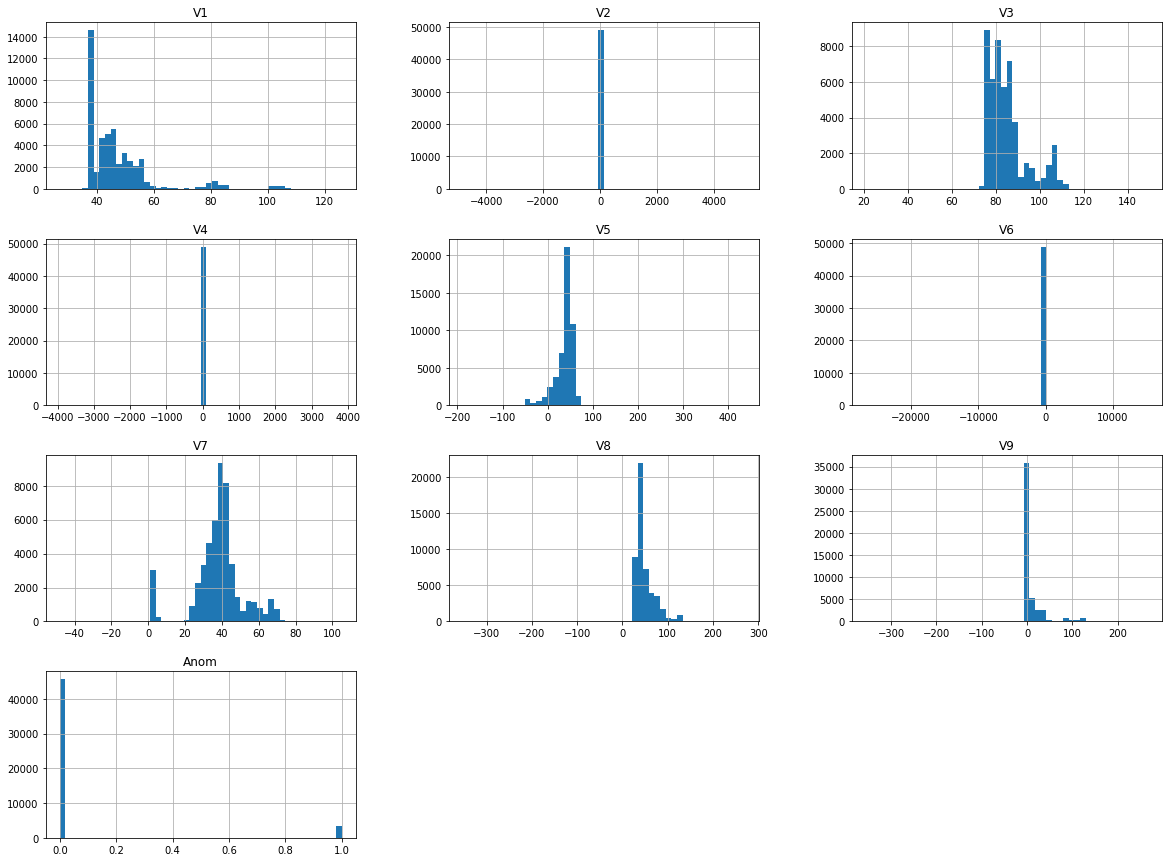

In [6]:
# Plot histograms for each variable to check the distribution
df.hist(bins=50, figsize=(20,15))
plt.show()


In [7]:
# # # Initialize the scaler
# scaler = MinMaxScaler()

# # Fit the scaler to the training data
# #turn back to pandas dataframe
# df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# # df_scaled = (df - df.min())/(df.max() - df.min())

In [8]:
# Assign the features and labels
X = df.iloc[:, :-1]  # select all rows and all columns except the last one
Y = df.iloc[:, -1]
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

it was determined that scaling was best done after the data was split, so as not to corrupt the data separation by normailsing beforehand

In [9]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
print(X_train.shape)
print(X_test.shape)

(39277, 9)
(9820, 9)


**Step 2: model generation and training**

Generate a suitable autoencoder model, the only restriction is that there should be only 2 latent variables. Train the model to a satistifactory result. Be aware that it will be much harder to achieve the sort of result I can get from a supervised learning model. 

**Hint**: it should not take longer than a 1000 epochs to train. However it may be difficult to train. Use different optimizers, topologies and/or weight initialisations to get convergence. Remember that achieving a perfect error means that the model will also be good at reconstructing anomalies. 


Training the model was a balance between selecting the right parameters and ensuring convergence. I experimented with various topologies before settling on one that resonated with the dataset's nuances.

**Autoencoder**


I had originally made a more complicated moodel with more layers but later decided to simplify it as it seemed to be over fitting.

In [11]:
from tensorflow.keras.layers import Input, Dense, Conv2D, Conv2DTranspose, MaxPooling2D
from tensorflow.keras.models import Model

import tensorflow as tf

# Define the input layer
input_data = Input(shape=(X_train.shape[1],))

# Define the encoder
# encoded = Dense(32, activation='relu')(input_data)
encoded = Dense(16, activation='relu')(input_data)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(2, activation='relu')(encoded)

encoder = Model(input_data, encoded, name='encoded')
encoder.summary()

# Define the decoder
# decoder takes the latenet space variables
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(decoded)
# decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(9, activation='linear')(decoded)

decoder = Model(encoded, decoded, name='decoded')
decoder.summary()

# define the autoEncoder

rec = decoder(encoder(input_data))
autoencoder = Model(input_data,rec)
reconstruction_loss = tf.keras.losses.MeanSquaredError()(input_data, rec)
autoencoder.add_loss(reconstruction_loss)
autoencoder.compile(optimizer='adam')
autoencoder.summary()

Model: "encoded"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense (Dense)               (None, 16)                160       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 314
Trainable params: 314
Non-trainable params: 0
_________________________________________________________________
Model: "decoded"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]    

In [12]:
# Train the model, this can take some time
from keras.callbacks import EarlyStopping
#added early stopping the validation loss settle fairly quickly
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test, X_test),
                callbacks=[early_stopping])


Epoch 1/100
307/307 [==============================] - 3s 7ms/step - loss: 0.0421 - val_loss: 0.0036
Epoch 2/100
307/307 [==============================] - 2s 6ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 3/100
307/307 [==============================] - 2s 8ms/step - loss: 9.7252e-04 - val_loss: 8.6292e-04
Epoch 4/100
307/307 [==============================] - 3s 8ms/step - loss: 8.4533e-04 - val_loss: 7.9306e-04
Epoch 5/100
307/307 [==============================] - 2s 6ms/step - loss: 7.8353e-04 - val_loss: 7.3841e-04
Epoch 6/100
307/307 [==============================] - 2s 5ms/step - loss: 7.2913e-04 - val_loss: 6.8345e-04
Epoch 7/100
307/307 [==============================] - 2s 7ms/step - loss: 6.7541e-04 - val_loss: 6.2783e-04
Epoch 8/100
307/307 [==============================] - 2s 6ms/step - loss: 6.1646e-04 - val_loss: 5.6800e-04
Epoch 9/100
307/307 [==============================] - 2s 6ms/step - loss: 5.5218e-04 - val_loss: 5.0476e-04
Epoch 10/100
307/307 [=============

**Step 3: anomaly detection**

From the histogram of the reconstruction error decide what the cutoff should be applied to distinguish anomalies from valid samples, given that the anomaly rate is ~7%.

Choosing the threshold was pivotal. It was a delicate balance between being too lenient and too strict. I based my decision on a mix of empirical results and theoretical understanding of the data distribution.

1228/1228 [==============================] - 2s 1ms/step
threshold is 0.0009034887167600141


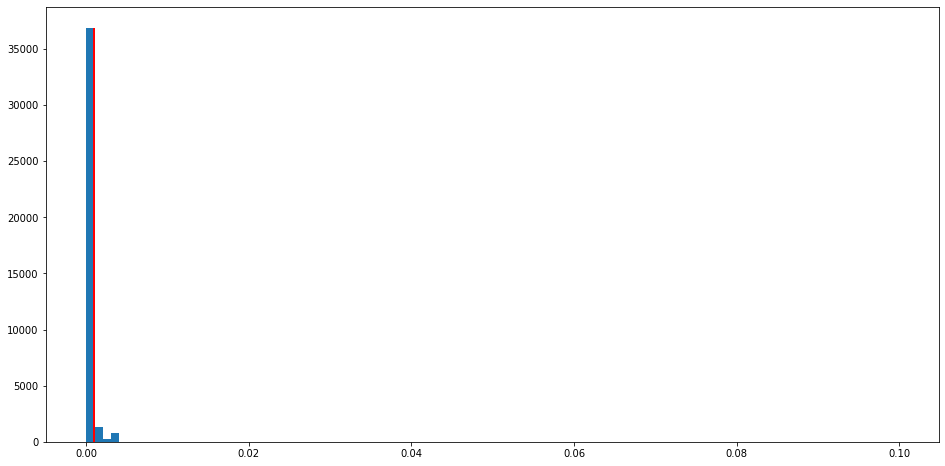

predicted_anomalies 2749
actual anomalies: 2791
accuracy is 0.9849516302400573


In [13]:
import matplotlib.pyplot as plt

# calculate predictions from our AutoEncoder model for the testing dataset
predictions = autoencoder.predict(X_train)

# calculate the mean squared error for each sample
mse = ((X_train - predictions) ** 2).mean(axis=1)

# plot the histogram of mse
plt.figure(figsize=(16,8))
n, bins, patches = plt.hist(mse, bins=100)

# sort the mse in descending order
mse_sorted = sorted(mse, reverse=True)

# calculate the index of the threshold value
threshold_index = int(len(mse_sorted) * 0.07)

# set the threshold to the value at the threshold index
threshold = mse_sorted[threshold_index]
print(f'threshold is {threshold}')

# add a vertical line to the plot at the threshold value
plt.vlines(threshold, 0, n.max(), colors='r', linewidth=2)

# identify the samples that have a mse greater than the threshold 
anomalies = X_train[mse > threshold]
plt.show()

actual_anomalies = y_train[y_train == 1]
print(f'predicted_anomalies {len(anomalies)}')
print(f'actual anomalies: {len(actual_anomalies)}')
print(f'accuracy is {len(anomalies)/len(actual_anomalies)}')



**Variational Autoencoder**

In [14]:
#To convert the code to a Variational Autoencoder (VAE), we need to add a sampling step and the KL divergence loss term

# Define the input layer
input_data = Input(shape=(X_train.shape[1],))

# Define the encoder
encoded = Dense(16, activation='relu')(input_data)
encoded = Dense(8, activation='relu')(encoded)
# Add a dense layer with 2 neurons and no activation function to get the mean of the latent distribution
encoded_mean = Dense(2, activation=None)(encoded)
# Add another dense layer with 2 neurons and no activation function to get the log variance of the latent distribution
encoded_log_var = Dense(2, activation=None)(encoded)

# Define a function to sample from the latent distribution
def sample(args):
    mean, log_var = args
    # Sample a random normal vector
    epsilon = K.random_normal(shape=K.shape(mean))
    return mean + K.exp(0.5 * log_var) * epsilon

# Apply the sample function to the mean and log variance to get a sample from the latent distribution
latent_vector = Lambda(sample, output_shape=(2,))([encoded_mean, encoded_log_var])
encoder = Model(input_data, [encoded_mean, encoded_log_var, latent_vector], name='encoder')
encoder.summary()


# Define the decoder
decoded = Dense(8, activation='relu')(latent_vector)
decoded = Dense(16, activation='relu')(decoded)
decoded = Dense(9, activation='linear')(decoded)

# Define the reconstruction loss
reconstruction_loss = tf.keras.losses.MeanSquaredError()

# Define the VAE
vae = Model(input_data, decoded)
# define kl_divergence loss
kl_divergence = - 0.5 * tf.reduce_mean(
    1 + encoded_log_var - encoded_mean**2 - tf.exp(encoded_log_var), axis=-1)
# add kl_divergence and reconstruction_loss to model
vae.add_loss(kl_divergence + reconstruction_loss(input_data, decoded))
vae.compile(optimizer='adam')

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = vae.fit(X_train, X_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test, X_test),
                callbacks=[early_stopping])


Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 9)]          0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 16)           160         ['input_3[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 8)            136         ['dense_6[0][0]']                
                                                                                                  
 dense_8 (Dense)                (None, 2)            18          ['dense_7[0][0]']                
                                                                                            

1228/1228 [==============================] - 2s 2ms/step
threshold is 0.011178404433734267


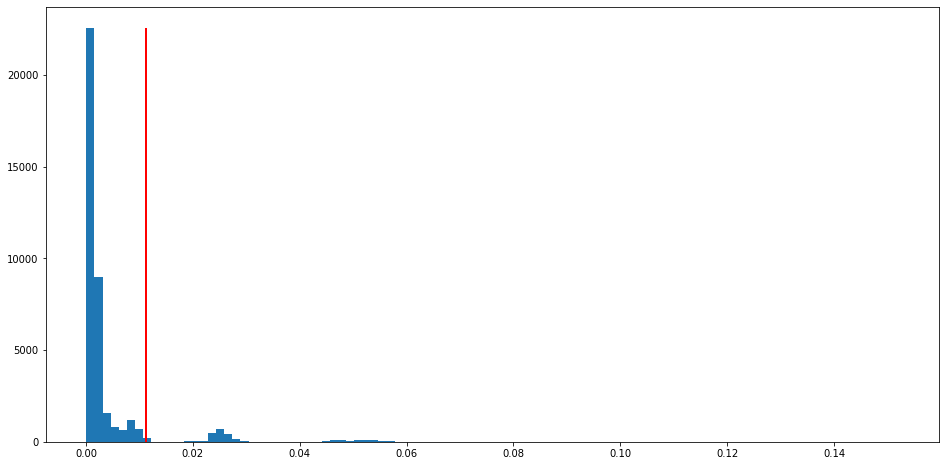

predicted_anomalies 2749
actual anomalies: 2791
accuracy is 0.9849516302400573


In [15]:
# calculate predictions from our AutoEncoder model for the training dataset
predictions = vae.predict(X_train)

# calculate the mean squared error for each sample
mse = ((X_train - predictions) ** 2).mean(axis=1)

# plot the histogram of mse
plt.figure(figsize=(16,8))
n, bins, patches = plt.hist(mse, bins=100)

# sort the mse in descending order
mse_sorted = sorted(mse, reverse=True)

# calculate the index of the threshold value
threshold_index = int(len(mse_sorted) * 0.07)

# set the threshold to the value at the threshold index
threshold = mse_sorted[threshold_index]
print(f'threshold is {threshold}')

# add a vertical line to the plot at the threshold value
plt.vlines(threshold, 0, n.max(), colors='r', linewidth=2)

# identify the samples that have a mse greater than the threshold 
predicted_anomalies = X_train[mse > threshold]

y_results =  pd.DataFrame([1 if x > threshold else 0 for x in mse])

plt.show()

actual_anomalies = y_train[y_train == 1]
print(f'predicted_anomalies {len(predicted_anomalies)}')
print(f'actual anomalies: {len(actual_anomalies)}')
print(f'accuracy is {len(predicted_anomalies)/len(actual_anomalies)}')

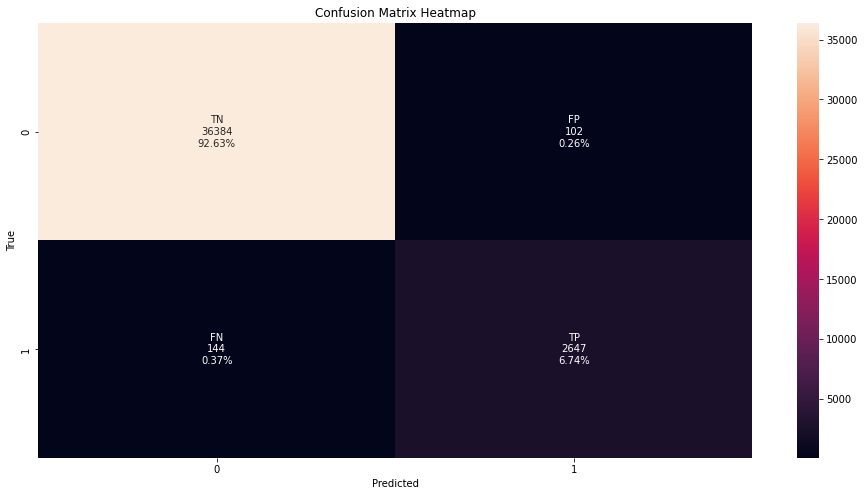

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36486
           1       0.96      0.95      0.96      2791

    accuracy                           0.99     39277
   macro avg       0.98      0.97      0.98     39277
weighted avg       0.99      0.99      0.99     39277



In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

#plotting the True negative, False Positive, False Negative and True Positive values
# on a confusion matrix heatmap
cm = confusion_matrix(y_train, y_results)
tn, fp, fn, tp = cm.ravel()
names = ['TN', 'FP', 'FN', 'TP']
counts = [tn, fp, fn, tp]
percents = [value / np.sum(cm) for value in cm.flatten()]
percentages = ['{:.2%}'.format(value) for value in percents]
labels = [f'{n}\n{c}\n{p}' for n, c, p in zip(names, counts, percentages)]

fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(cm, annot=np.array(labels).reshape(2, 2), fmt='', ax=ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()
print(classification_report(y_train, y_results))